In [ ]:
!pip install langgraph

In [2]:
from langgraph.graph import START, END, StateGraph
from typing import TypedDict, Literal
import random

In [3]:
class JourneyState(TypedDict):
    current_location: str

In [4]:
def karaikudi(state: JourneyState) -> JourneyState:
    print("start journey from karaikudi")
    return {"current_location": "departure from karaikudi"}

In [5]:
def madurai(state: JourneyState) -> JourneyState:
    print("arrived at madurai")
    return {"current_location": "visited madurai"}

In [6]:
def trichy(state: JourneyState) -> JourneyState:
    print("arrived at trichy")
    return {"current_location": "visited trichy"}

In [7]:
def chennai(state: JourneyState) -> JourneyState:
    print("reached at chennai")
    return {"current_location": "reached chennai"}

In [8]:
def decide_intermediate_city(state: JourneyState) -> Literal["Madurai", "Trichy"]:
    print(f"Deciding route... last update: {state["current_location"]}")
    if random.random() < 0.5:
        print("--> route selected trichy")
        return "Trichy"
    else:
        print("--> route selected madurai")
        return "Madurai"

In [9]:
builder = StateGraph(JourneyState)

In [10]:
builder.add_node("Karaikudi", karaikudi)
builder.add_node("Madurai", madurai)
builder.add_node("Trichy", trichy)
builder.add_node("Chennai", chennai)

In [11]:
builder.add_edge(START, "Karaikudi")

In [12]:
builder.add_conditional_edges("Karaikudi", decide_intermediate_city)

In [13]:
builder.add_edge("Madurai", "Chennai")
builder.add_edge("Trichy", "Chennai")
builder.add_edge("Chennai", END)

In [14]:
graph = builder.compile()

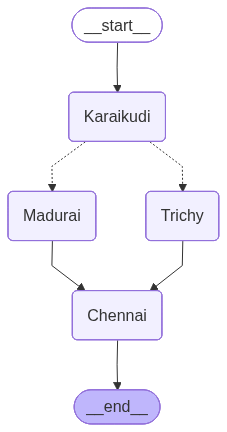

In [15]:
graph